In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv("data/streaming_titles_clean.csv")
data.drop(columns=data.columns[0], axis=1, inplace=True)

print(len(data))
print(data.columns)
data.tail()

9971
Index(['index', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'streaming_service', 'score', 'imdbid', 'genre.Crime',
       'genre.Drama', 'genre.Thriller', 'genre.Action', 'genre.Horror',
       'genre.Science_Fiction', 'genre.Music', 'genre.Reality',
       'genre.Romance', 'genre.Comedy', 'genre.Mystery', 'genre.Documentary',
       'genre.History', 'genre.Teen', 'genre.Health_&_Wellness',
       'genre.Lifestyle', 'genre.Culture', 'genre.Black_Stories', 'genre.News',
       'genre.Latino', 'genre.Adventure', 'genre.Anime', 'genre.Talk_Show',
       'genre.Sketch_Comedy', 'genre.Family', 'genre.Kids', 'genre.Classics',
       'genre.LGBTQ', 'genre.Adult_Animation', 'genre.Sitcom',
       'genre.Cooking_&_Food', 'genre.Sports', 'genre.Game_Shows',
       'genre.International', 'genre.Cartoons', 'genre.Science_&_Technology',
       'genre.Stand_Up', 'genre.Special_Interest',

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,...,genre.Coming_of_Age,genre.Anthology,genre.Buddy,genre.Parody,genre.Spy/Espionage,genre.Survival,genre.Soap_Opera_/_Melodrama,genre.Dance,genre.Medical,genre.Disaster
9966,22993,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,...,False,False,False,False,False,False,False,False,False,False
9967,22994,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,...,False,False,False,False,False,False,False,False,False,False
9968,22995,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,...,False,False,False,False,False,False,False,False,False,False
9969,22996,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,...,True,False,True,False,False,False,False,False,False,False
9970,22997,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,United States,"April 1, 2020",2012,TV-G,...,False,False,False,False,False,False,False,False,False,False


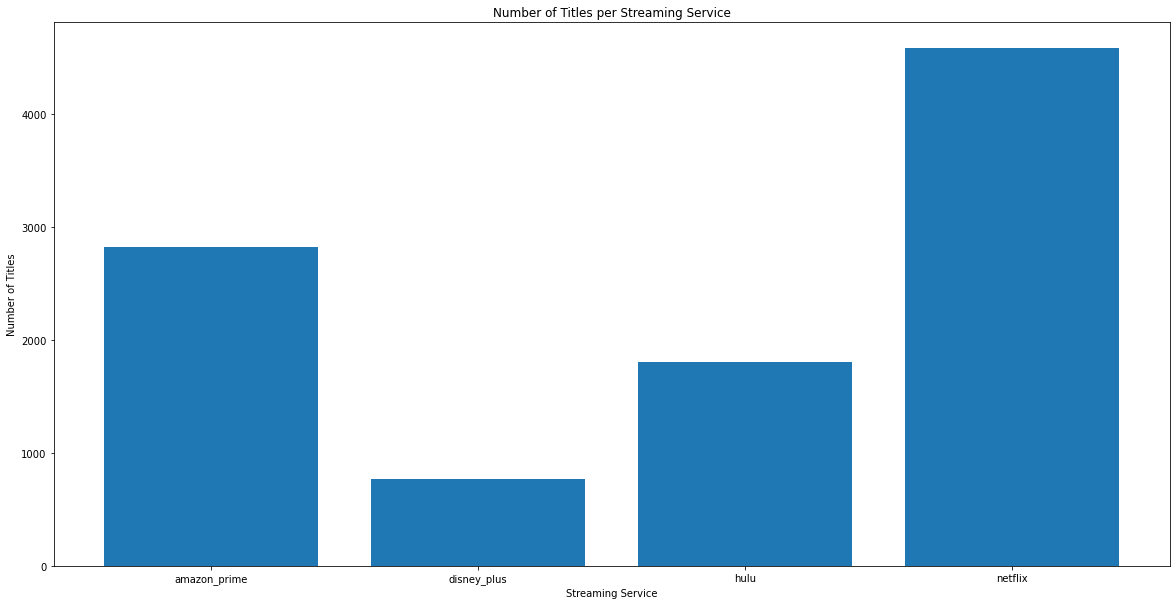

In [29]:
# 1. Bar Chart of the Number of Titles per Streaming Service

# Group data by streaming service and count number of titles
counts = data.groupby("streaming_service")["title"].count()

# Create bar chart
plt.figure(figsize=(20,10))
plt.bar(counts.index, counts.values)

# Add labels and title
plt.xlabel("Streaming Service")
plt.ylabel("Number of Titles")
plt.title("Number of Titles per Streaming Service")

# Display chart
plt.show()

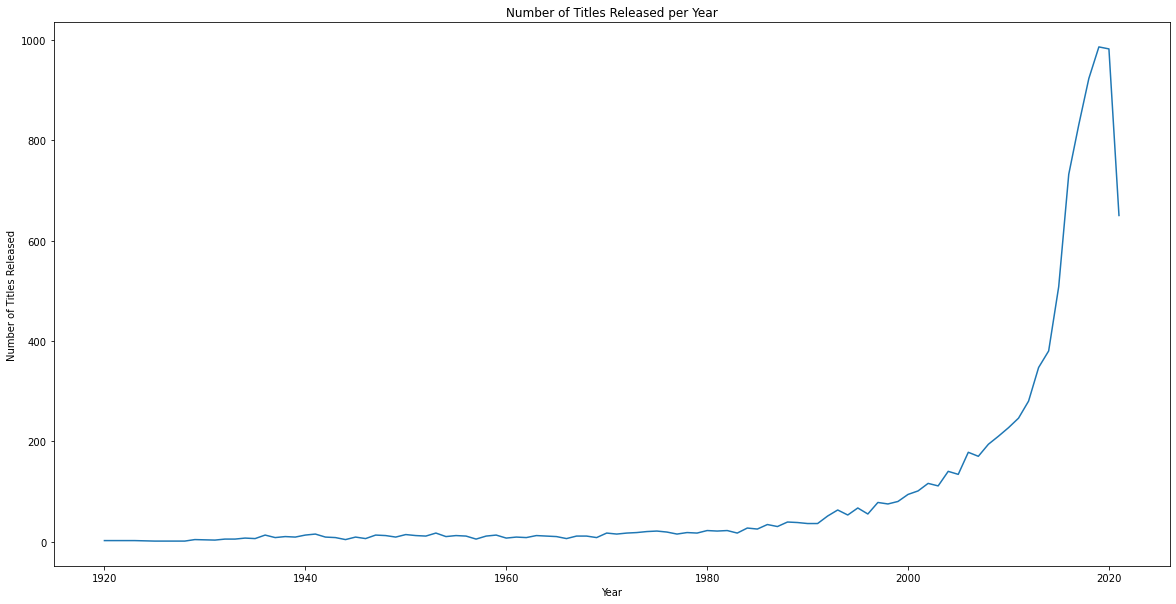

In [27]:
# 2. Line Chart of the Number of Titles Released per Year

# Group data by year and count number of titles
counts = data.groupby("release_year")["title"].count()

# Create line chart
plt.figure(figsize=(20,10))
plt.plot(counts.index, counts.values)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Number of Titles Released")
plt.title("Number of Titles Released per Year")

# Display chart
plt.show()

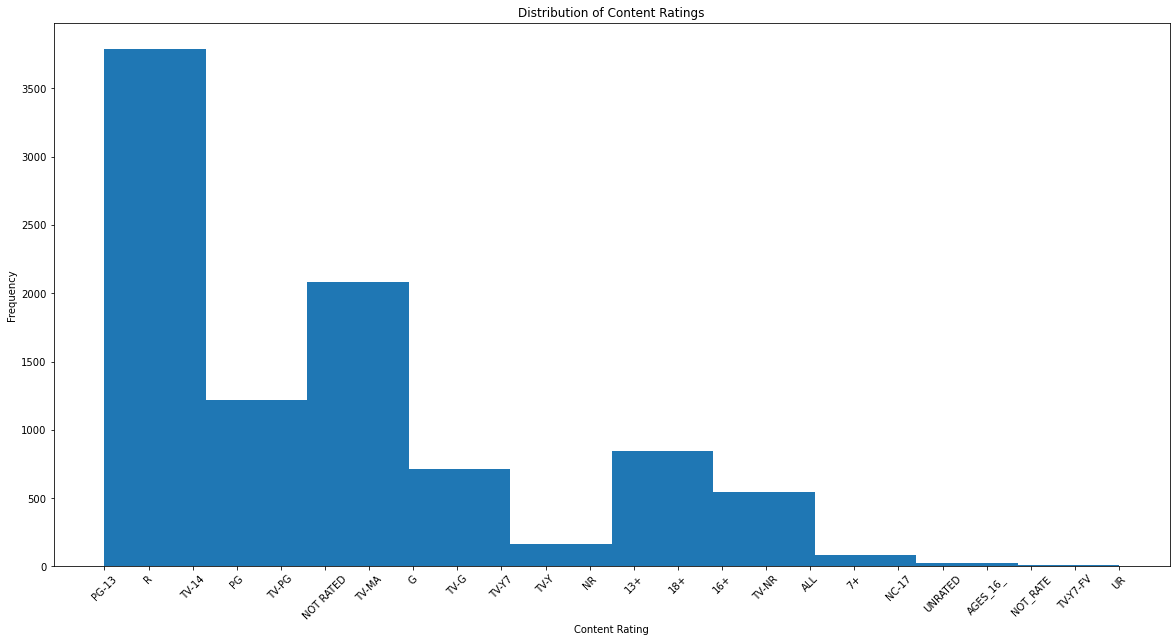

In [49]:
# 3. Histogram of the Distribution of Content Ratings

# Create histogram of content ratings
plt.figure(figsize=(20,10))
plt.hist(data["rating"].dropna(), bins=10)

# Add labels and title
plt.xlabel("Content Rating")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.title("Distribution of Content Ratings")

# Display chart
plt.show()

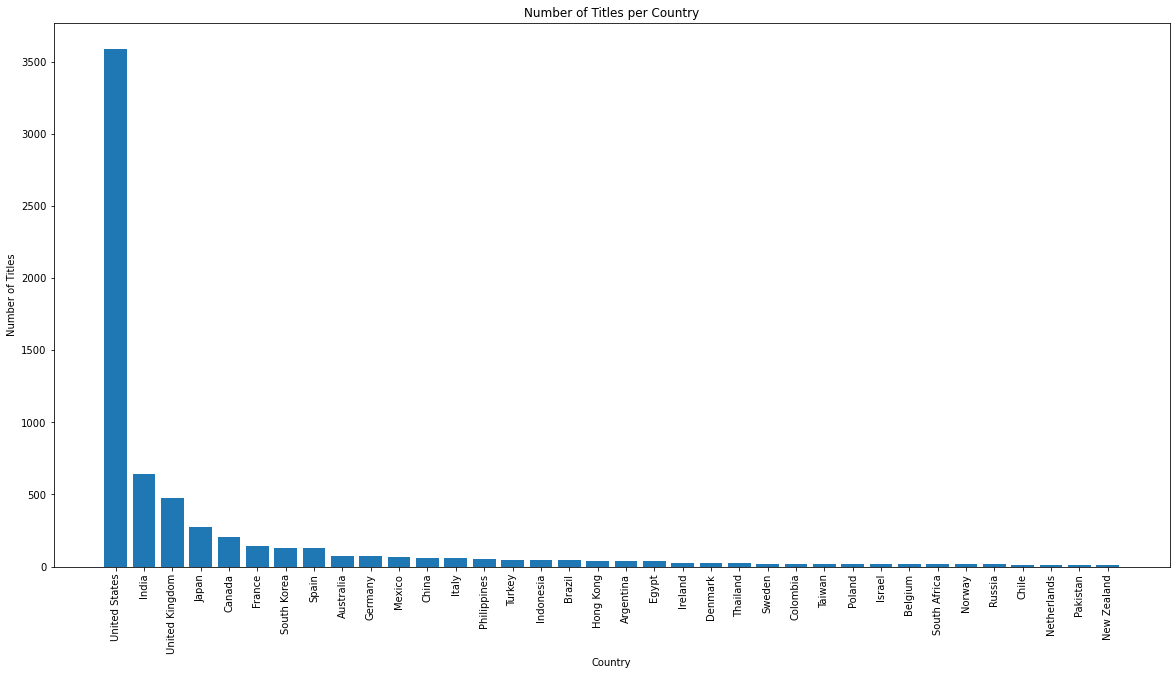

In [44]:
# Bar Chart of the Number of Titles per Country (count > 10)

# Extract first country from country column
chart = data.copy()
chart["country"] = chart["country"].str.split(", ").str[0]

# Group data by country and count number of titles
counts = chart.groupby("country")["title"].count()
counts = counts[counts > 10].sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(20,10))
plt.bar(counts.index, counts.values)

# Add labels and title
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Number of Titles")
plt.title("Number of Titles per Country")

# Display chart
plt.show()

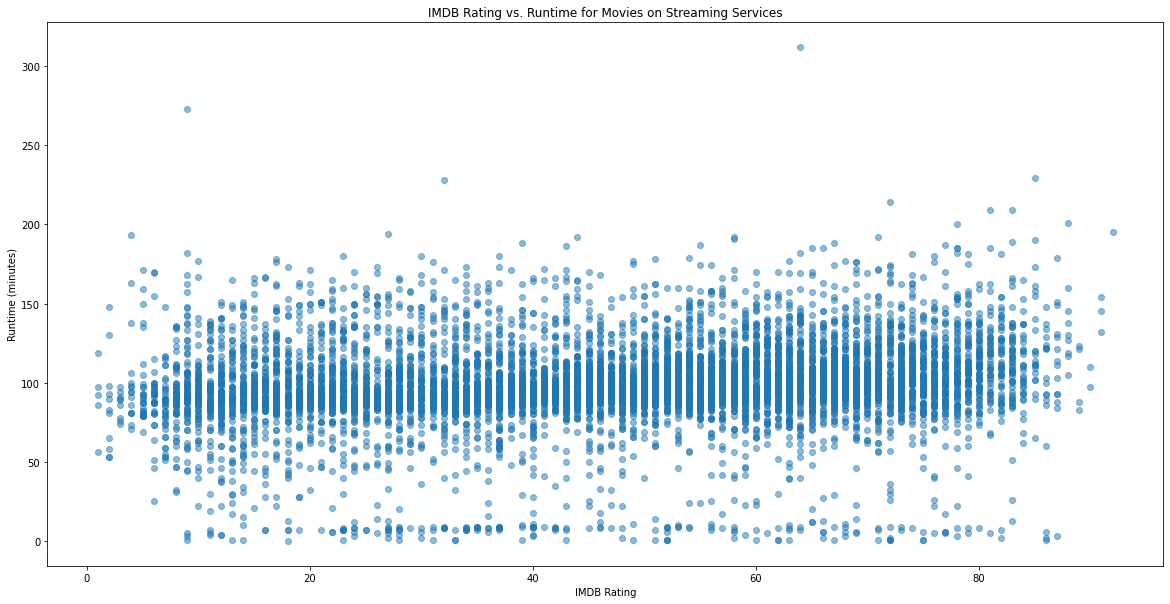

In [60]:
# Filter out TV shows and missing ratings
movies = data[(data["type"] == "Movie") & (data["score"].notnull())]

# Create scatter plot of IMDB rating vs. runtime
plt.figure(figsize=(20,10))
plt.scatter(movies["score"], movies["duration"], alpha=0.5)

# Add labels and title
plt.xlabel("IMDB Rating")
plt.ylabel("Runtime (minutes)")
plt.title("IMDB Rating vs. Runtime for Movies on Streaming Services")

# Display chart
plt.show()

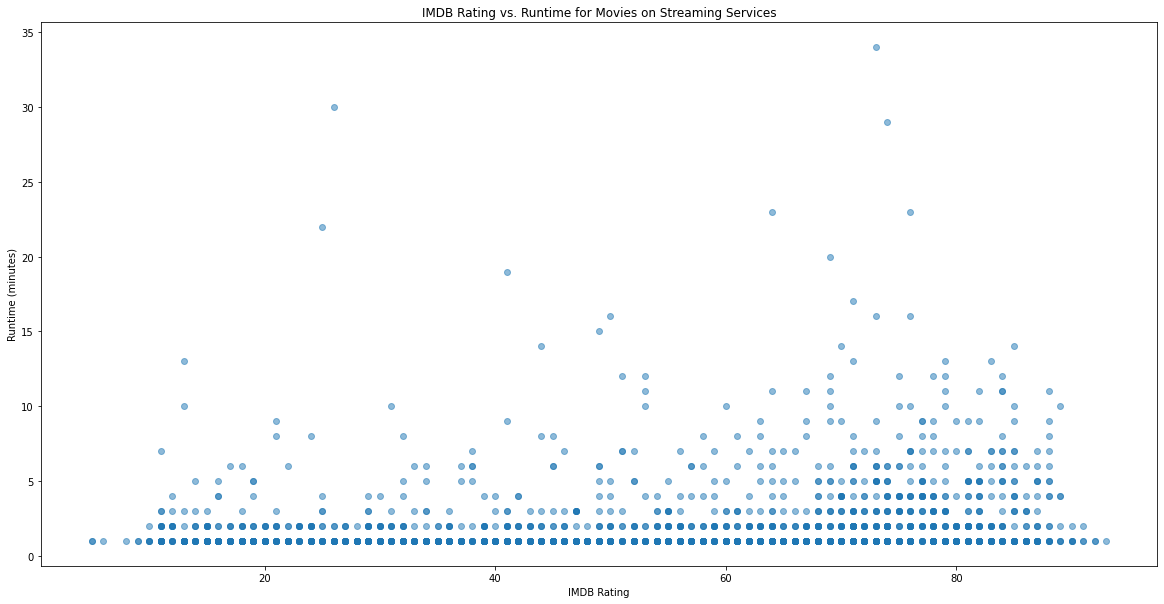

In [61]:
# Filter out TV shows and missing ratings
tv = data[(data["type"] == "TV Show") & (data["score"].notnull())]

# Create scatter plot of IMDB rating vs. runtime
plt.figure(figsize=(20,10))
plt.scatter(tv["score"], tv["duration"], alpha=0.5)

# Add labels and title
plt.xlabel("IMDB Rating")
plt.ylabel("Runtime (seasons)")
plt.title("IMDB Rating vs. Runtime for Movies on Streaming Services")

# Display chart
plt.show()

<Figure size 1440x1440 with 0 Axes>

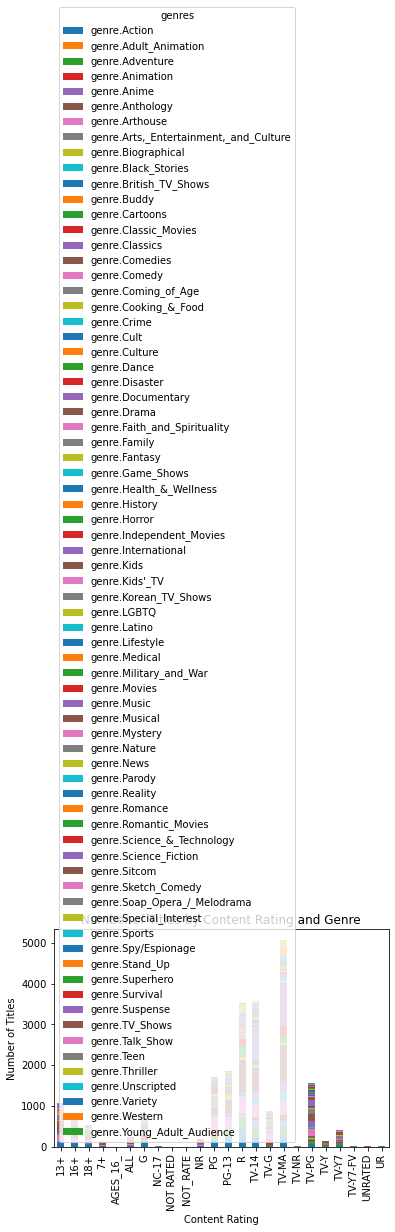

In [79]:
# stacked bar chart of the number of titles by content rating and genre:

# Extract the columns that start with "genre"
genre_cols = [col for col in data.columns if col.startswith("genre")]

# Melt the data to create a "genres" column with the name of each genre
data_melt = pd.melt(data, id_vars=["rating"], value_vars=genre_cols, var_name="genres", value_name="is_genre")

# Group data by content rating and genre, and count the number of titles in each group
counts = data_melt[data_melt["is_genre"] == True].groupby(
    ["rating", "genres"])["is_genre"].count().reset_index()

# Pivot the data to create a stacked bar chart
counts_pivot = counts.pivot(index="rating", columns="genres", values="is_genre")

# Create the stacked bar chart
plt.figure(figsize=(20, 20))
counts_pivot.plot(kind="bar", stacked=True)
plt.xlabel("Content Rating")
plt.ylabel("Number of Titles")
plt.title("Number of Titles by Content Rating and Genre")

# Show the chart
plt.show()

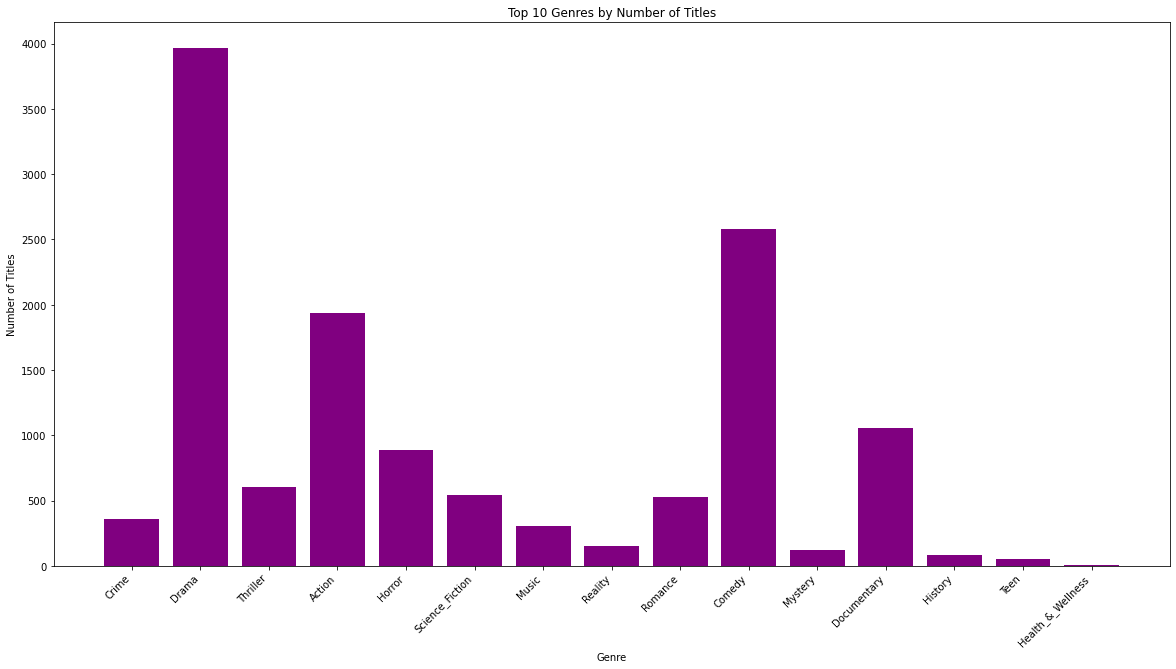

In [86]:
# Get list of genre columns
genre_cols = [col for col in data.columns if col.startswith("genre")]

# Sum the number of true values in each genre column to get the total number of titles for each genre
genre_counts = data[genre_cols].sum()#.sort_values(ascending=False)

# Get the top 10 genres by number of titles
top_genres = genre_counts[:15]

# Remove "genre." from the genre names in the x-axis labels
labels = [col.replace("genre.", "") for col in top_genres.index]

# Create bar chart
plt.figure(figsize=(20, 10))
plt.bar(labels, top_genres.values, color='purple')

# Add labels and title
plt.xlabel("Genre")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Titles")
plt.title("Top 10 Genres by Number of Titles")

# Display chart
plt.show()